# Import Libraries and Data

In [1]:
# %reload_ext autoreload
%load_ext autoreload
%autoreload 2

In [2]:
# import libraries
import os
from IPython.display import Image

import pandas as pd
from sklearn.preprocessing import LabelEncoder

import helper as hp

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# declare variables
root = '../data/olist'
dfs = {}

# iterate through all the files in the root directory 
# and import all the csv files that begin with 'olist'
for file in os.listdir(root):
    if file.endswith('.csv') and file.startswith('olist'):
        filename = file.split('_')[1:-1]
        filepath = os.path.join(root, file)
        if len(filename) > 1:
            filename = filename[0] + '_' + filename[1]
            dfs[filename] = pd.read_csv(filepath)
        else:
            dfs[filename[0]] = pd.read_csv(filepath)

# dateframes size            
for key, _ in dfs.items():
    print(f"{key:<18}{dfs[key].shape}")

customers         (99441, 5)
order_items       (112650, 7)
orders            (99441, 8)
products          (32951, 9)


In [4]:
# basic info of each dataframe
for key, _ in dfs.items():
    print('\033[1m' + key + '\033[0m')
    print(dfs[key].info() , '\n')

customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

order_items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit

In [5]:
dfs['customers'].nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [6]:
dfs['customers'].drop(columns=['customer_zip_code_prefix', 'customer_state'], inplace=True)
dfs['order_items'] = dfs['order_items'][['order_id', 'product_id']]
dfs['orders'] = dfs['orders'][['order_id', 'customer_id', 'order_purchase_timestamp']]
dfs['products'] = dfs['products'][['product_id', 'product_weight_g']]

In [7]:
# basic info of each dataframe
for key, _ in dfs.items():
    print('\033[1m' + key + '\033[0m')
    print(dfs[key].info() , '\n')

customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB
None 

order_items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   order_id    112650 non-null  object
 1   product_id  112650 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB
None 

orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 no

In [8]:
# fill null values of product weight with 0
dfs["products"]["product_weight_g"] = dfs["products"]["product_weight_g"].fillna(0)
dfs["products"].isna().any()

product_id          False
product_weight_g    False
dtype: bool

# Merge Dataframes

Database Schema


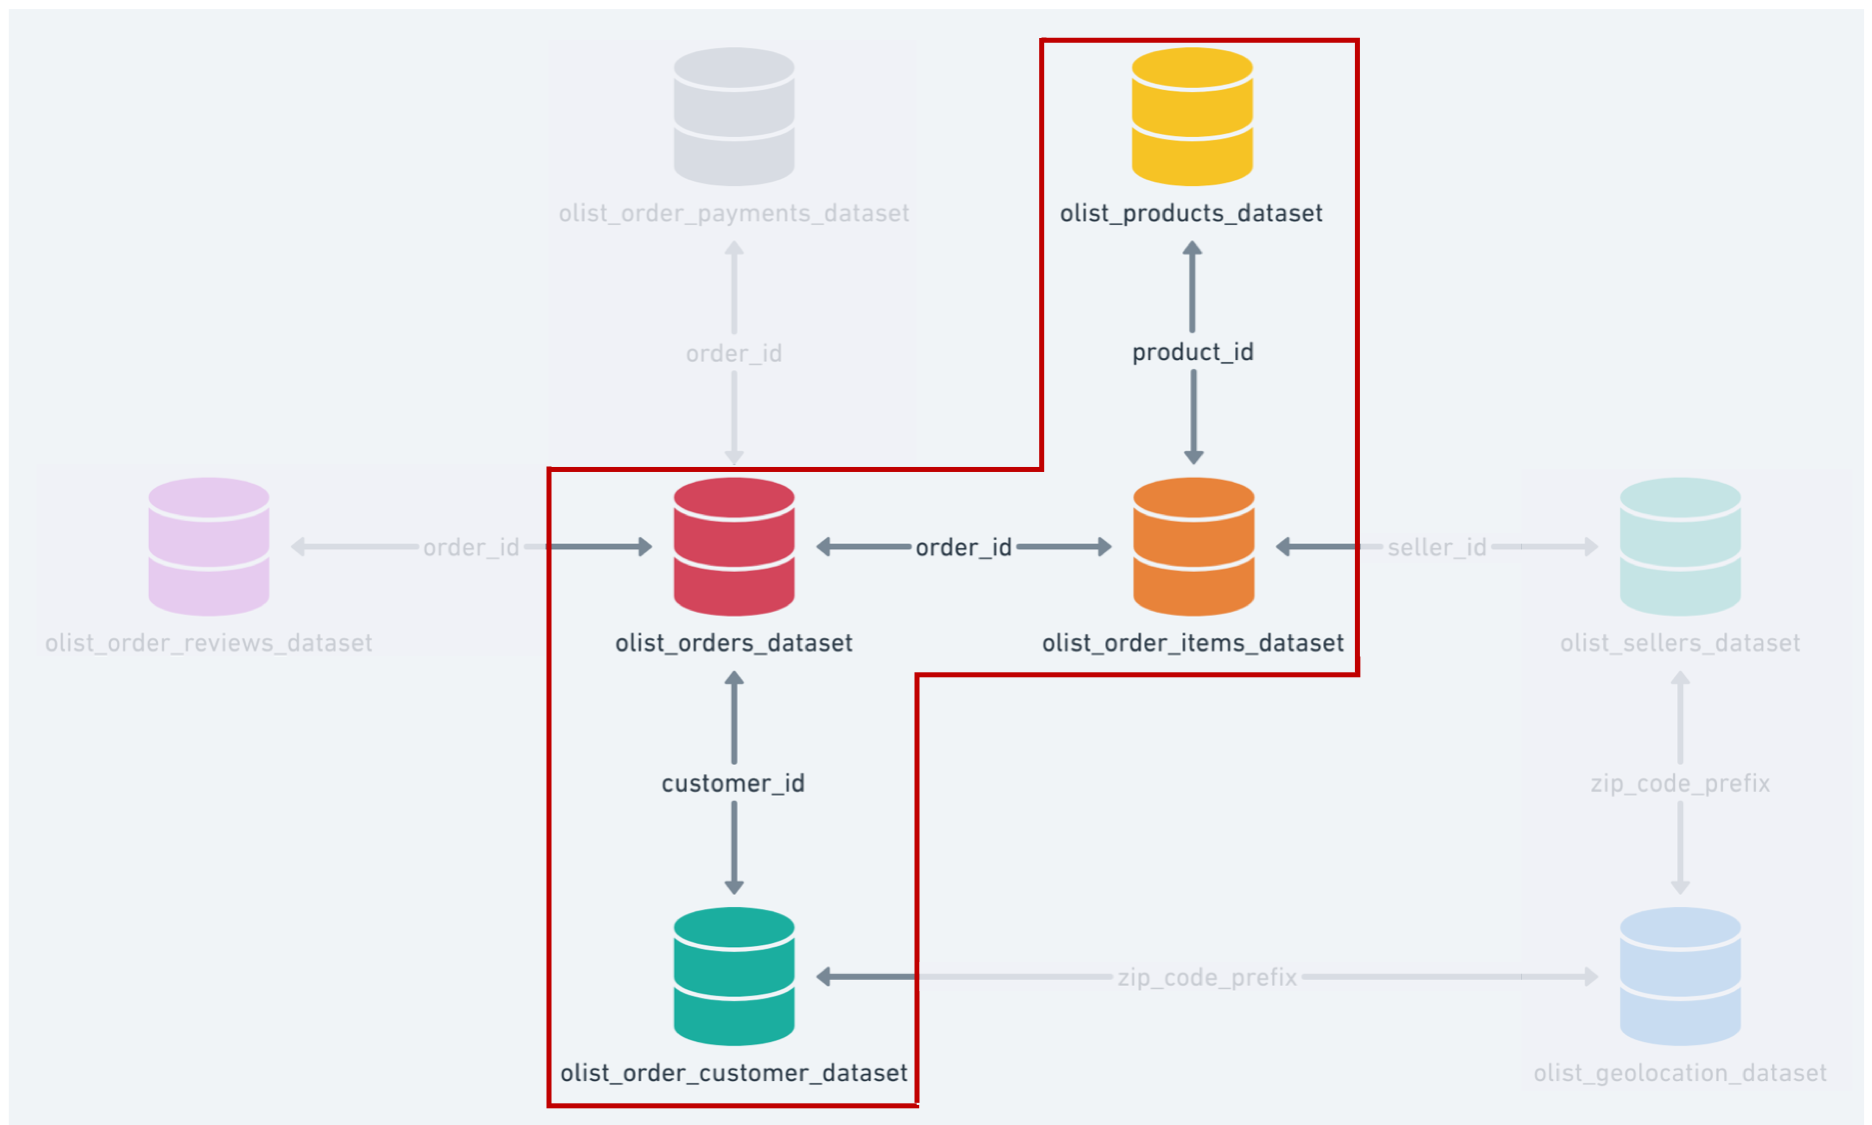

In [9]:
# show database schema
print("Database Schema")
print("===============")
Image(filename=root + '/schema.png')

In [10]:
def join_dfs(
    df1: pd.DataFrame, df2: pd.DataFrame, key: str, how: str = "left"
) -> pd.DataFrame:
    print(f"{'The shape of df1:':<22}", df1.shape)
    print(f"{'The shape of df2:':<22}", df2.shape)
    df = df1.merge(df2, how=how, on=key)
    print("The shape of final df:", df.shape)
    return df

##### Merge 'customer' and 'order'

In [11]:
# join 'consumers' and 'order' dataframes
df = join_dfs(
    dfs["customers"],
    dfs["orders"], key="customer_id",
    how="left",
)
df.head()

The shape of df1:      (99441, 3)
The shape of df2:      (99441, 3)
The shape of final df: (99441, 5)


,customer_id,customer_unique_id,customer_city,order_id,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30


In [12]:
# No need "customer_id" from now on
df.drop(columns='customer_id', inplace=True)
df.shape

(99441, 4)

##### Merge df with 'order_items'

In [13]:
print(df.order_id.nunique())
print(dfs['order_items'].order_id.nunique())
print(dfs['order_items'].shape)

99441
98666
(112650, 2)


In [14]:
# join order_items' info dataframes
df = join_dfs(df, dfs["order_items"], key="order_id", how="left")
df.head()

The shape of df1:      (99441, 4)
The shape of df2:      (112650, 2)
The shape of final df: (113425, 5)


,customer_unique_id,customer_city,order_id,order_purchase_timestamp,product_id
0,861eff4711a542e4b93843c6dd7febb0,franca,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,a9516a079e37a9c9c36b9b78b10169e8
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,4aa6014eceb682077f9dc4bffebc05b0
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,bd07b66896d6f1494f5b86251848ced7
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,a5647c44af977b148e0a3a4751a09e2e
4,345ecd01c38d18a9036ed96c73b8d066,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,9391a573abe00141c56e38d84d7d5b3b


In [15]:
# No need "order_id" from now on
df.drop(columns='order_id', inplace=True)
df.shape

(113425, 4)

##### Merge df with 'products'

In [16]:
# join consumers info dataframes
df = join_dfs(df, dfs["products"], key="product_id", how="left")
df.head()

The shape of df1:      (113425, 4)
The shape of df2:      (32951, 2)
The shape of final df: (113425, 5)


,customer_unique_id,customer_city,order_purchase_timestamp,product_id,product_weight_g
0,861eff4711a542e4b93843c6dd7febb0,franca,2017-05-16 15:05:35,a9516a079e37a9c9c36b9b78b10169e8,8683.0
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,2018-01-12 20:48:24,4aa6014eceb682077f9dc4bffebc05b0,10150.0
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,2018-05-19 16:07:45,bd07b66896d6f1494f5b86251848ced7,8267.0
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,2018-03-13 16:06:38,a5647c44af977b148e0a3a4751a09e2e,12160.0
4,345ecd01c38d18a9036ed96c73b8d066,campinas,2018-07-29 09:51:30,9391a573abe00141c56e38d84d7d5b3b,5200.0


# Clean Data

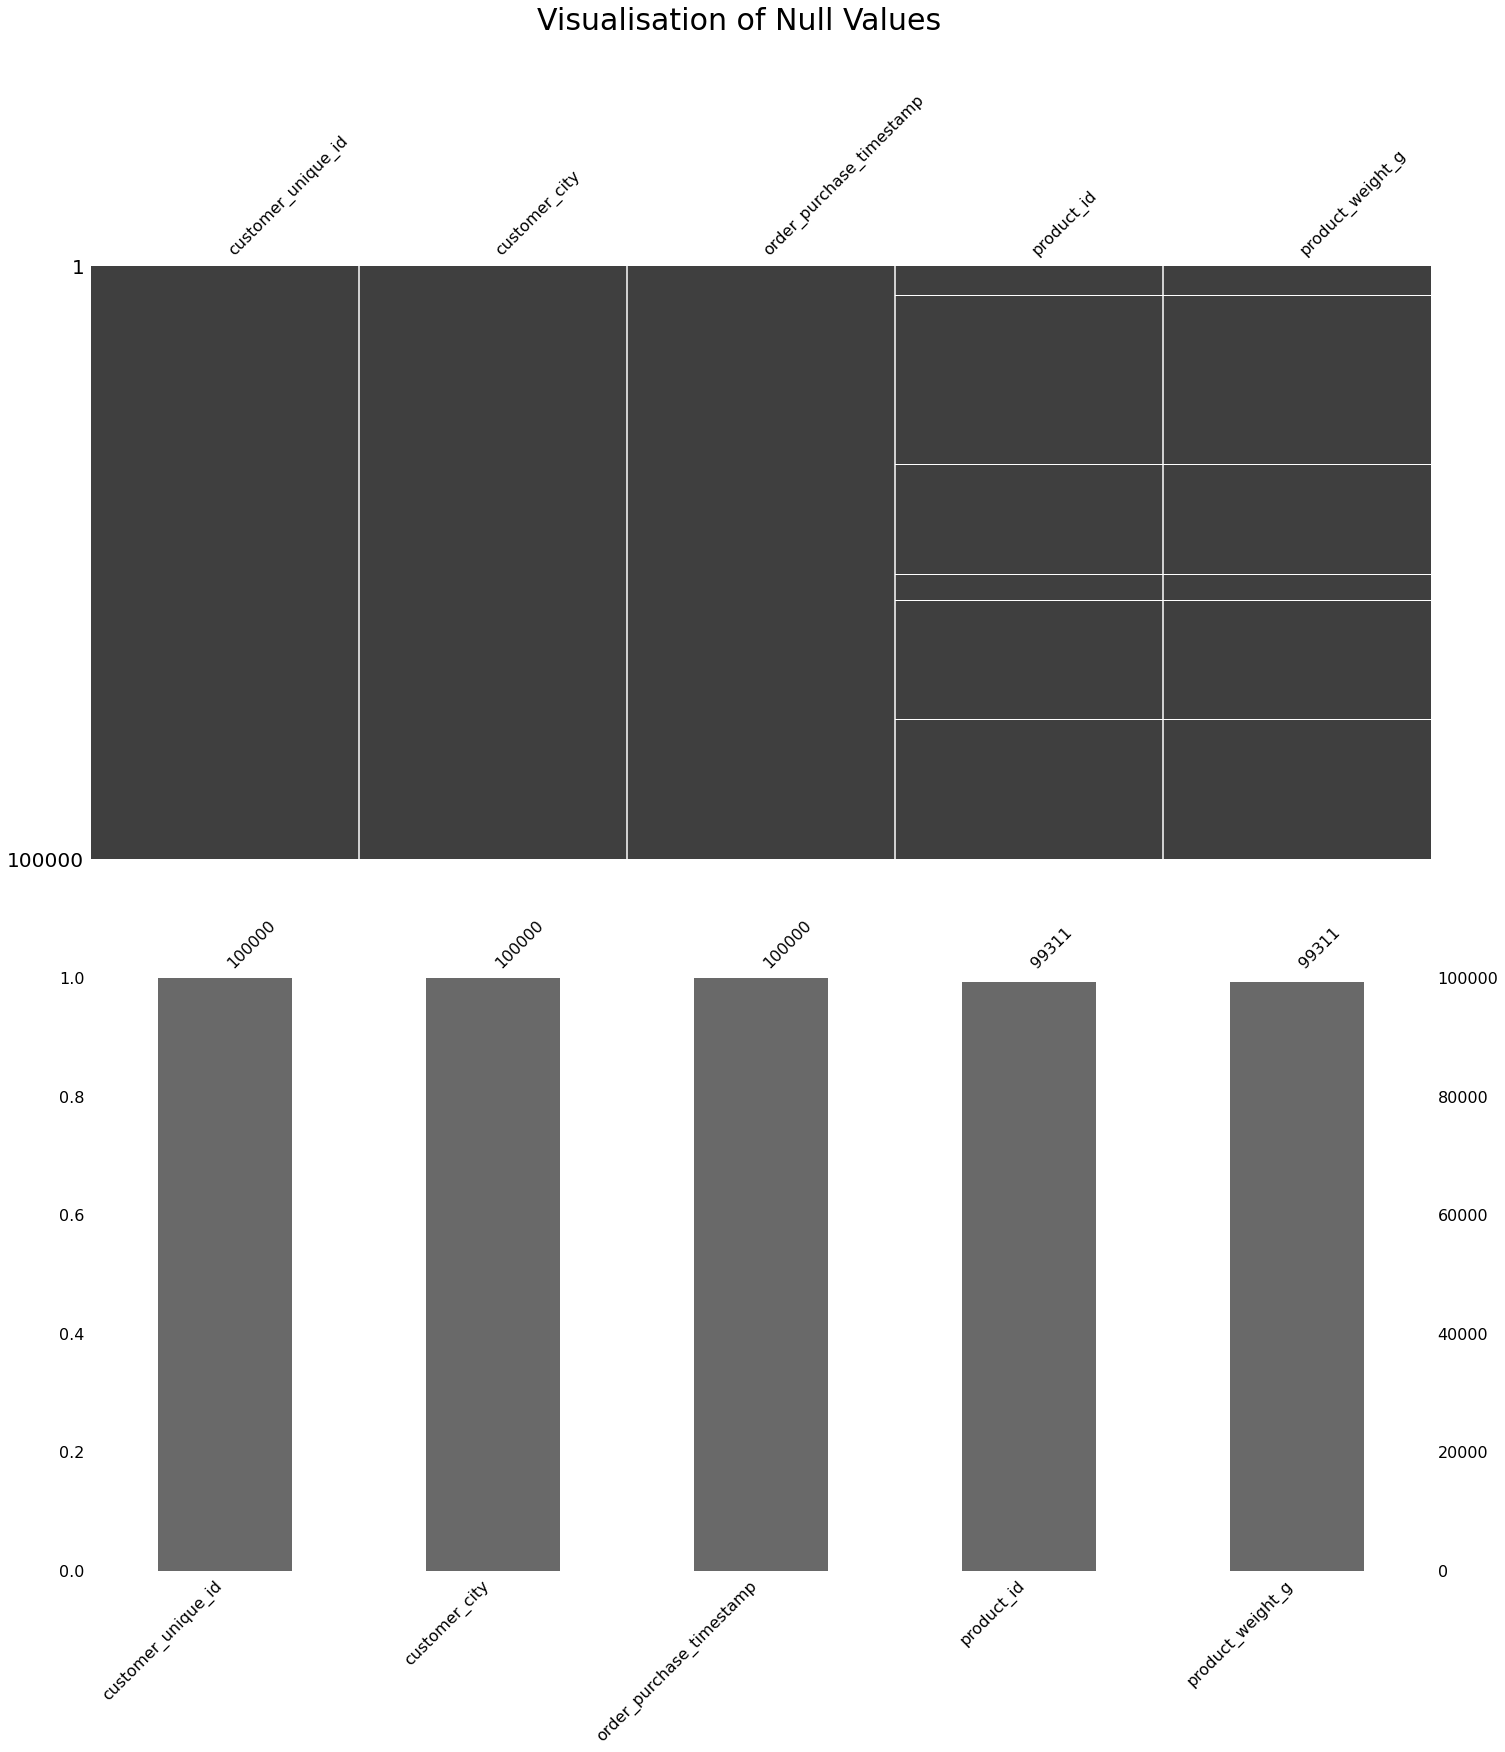

In [17]:
# check null values pattern in the merged dataframe
hp.null_visual(df, num_rows=100000)

In [18]:
# remove rows that contain null values between 'product_id' and 'product_weight_g'
df = hp.clean_rows_na(df, col1='product_id', col2='product_weight_g')

Original shape: (113425, 5) 

Shape after removing null rows between 'product_id'
 and 'product_weight_g':

(112650, 5) 



In [19]:
df.isnull().any()

customer_unique_id          False
customer_city               False
order_purchase_timestamp    False
product_id                  False
product_weight_g            False
dtype: bool

In [20]:
df.head()

,customer_unique_id,customer_city,order_purchase_timestamp,product_id,product_weight_g
0,861eff4711a542e4b93843c6dd7febb0,franca,2017-05-16 15:05:35,a9516a079e37a9c9c36b9b78b10169e8,8683.0
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,2018-01-12 20:48:24,4aa6014eceb682077f9dc4bffebc05b0,10150.0
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,2018-05-19 16:07:45,bd07b66896d6f1494f5b86251848ced7,8267.0
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,2018-03-13 16:06:38,a5647c44af977b148e0a3a4751a09e2e,12160.0
4,345ecd01c38d18a9036ed96c73b8d066,campinas,2018-07-29 09:51:30,9391a573abe00141c56e38d84d7d5b3b,5200.0


In [21]:
df.columns

Index(['customer_unique_id', 'customer_city', 'order_purchase_timestamp',
       'product_id', 'product_weight_g'],
      dtype='object')

In [22]:
# rename 'customer_unique_id' column
df.rename(columns={"customer_unique_id": "customer_id"}, inplace=True)

# encode customer_id, customer_city and product_id
cols_to_encode = ['customer_id', 'customer_city', 'product_id']
for col in cols_to_encode:
    df[col] = LabelEncoder().fit_transform(df[col].values)

# add a boolean column to note if there is a purchase (purchase = 1)
df["purchase"] = 1

# backup dataframe
df_cleaned = df.copy()
df.to_csv(root + '/df_cleaned.csv', index=False)

df.head()

,customer_id,customer_city,order_purchase_timestamp,product_id,product_weight_g,purchase
0,50044,1379,2017-05-16 15:05:35,21694,8683.0,1
1,15329,3420,2018-01-12 20:48:24,9721,10150.0,1
2,2253,3588,2018-05-19 16:07:45,24283,8267.0,1
3,14097,2336,2018-03-13 16:06:38,21209,12160.0,1
4,19599,705,2018-07-29 09:51:30,18959,5200.0,1
